## 랜덤 포레스트

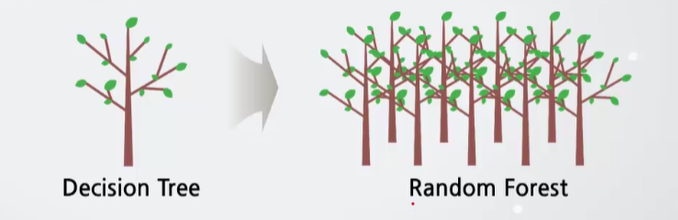

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state=42)

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
score = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
np.mean(score['train_score'])

0.9973541965122431

In [11]:
np.mean(score['test_score'])

0.8905151032797809

In [12]:
rf.fit(train_input, train_target)
rf.feature_importances_

array([0.23167441, 0.50039841, 0.26792718])

In [16]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
rf.oob_score_

0.8934000384837406

## 엑스트라 트리

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
score = cross_validate(et, train_input, train_target, n_jobs=-1, return_train_score=True)
np.mean(score['train_score'])

0.9974503966084433

In [23]:
np.mean(score['test_score'])

0.8887848893166506

In [24]:
et.fit(train_input, train_target)
et.feature_importances_

array([0.20183568, 0.52242907, 0.27573525])

## 그래디언트 부스팅

깊이가 얕은 결정트리를 이용해 이전 트리의 오차를 보완

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
score = cross_validate(gb, train_input, train_target, n_jobs=-1, return_train_score=True)
gb.fit(train_input, train_target)

GradientBoostingClassifier(random_state=42)

In [28]:
np.mean(score['train_score'])

0.8881086892152563

In [29]:
np.mean(score['test_score'])

0.8720430147331015

In [30]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
score = cross_validate(gb, train_input, train_target, n_jobs=-1, return_train_score=True)
gb.fit(train_input, train_target)

np.mean(score['train_score'])

0.9464595437171814

In [32]:
np.mean(score['test_score'])

0.8780082549788999

In [34]:
gb.feature_importances_

array([0.15872278, 0.68011572, 0.16116151])

## 히스토그램 기반 그래디언트 부스팅

In [37]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
score = cross_validate(hgb, train_input, train_target, n_jobs=-1, return_train_score=True)
np.mean(score['train_score'])

0.9321723946453317

In [38]:
np.mean(score['test_score'])

0.8801241948619236

In [44]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
result.importances_mean

array([0.08876275, 0.23438522, 0.08027708])

In [46]:
result = permutation_importance(hgb, test_input, test_target, n_jobs=-1, n_repeats=10, random_state=42)
result.importances_mean

array([0.05969231, 0.20238462, 0.049     ])

In [47]:
hgb.score(test_input, test_target)

0.8723076923076923